In [50]:
#steps 

#0 preprocess + EDA + feature Selection
#1 Extract input and output cols
#3 Scale the values
#4 Train Test spilt
#5 evaluate the model/ model selection
#6 deploy the model

In [51]:
import pandas as pd
import numpy as np


In [52]:
df = pd.read_csv('placement.csv')

In [53]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [54]:
df.shape

(100, 4)

In [55]:
df = df.iloc[:, 1:]   # this will gives the preprocessd data all rows but the columns from the   1

In [56]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [57]:
import matplotlib.pyplot as plt


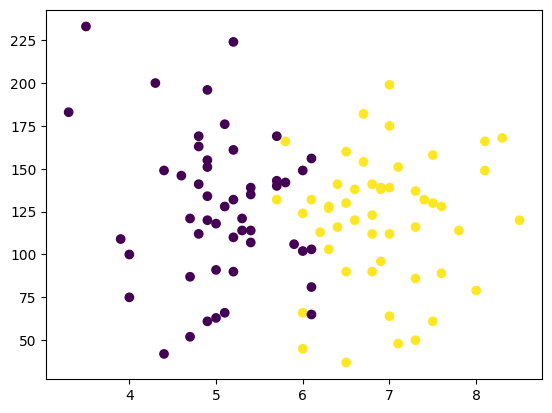

In [58]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])  

In [59]:
X = df.iloc[:,0:2]
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [60]:
Y = df.iloc[:,-1]
Y 

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.1)    

In [63]:
#scaling

from sklearn.preprocessing import StandardScaler

In [64]:
scalar = StandardScaler()

In [65]:
X_train = scalar.fit_transform(X_train)

In [66]:
X_train

array([[ 0.97873841,  0.68343302],
       [ 1.15814056, -0.92934761],
       [ 0.70963518, -0.01130325],
       [ 0.35083087,  0.43531293],
       [ 0.6199341 ,  1.45260533],
       [-0.72558204, -0.33385938],
       [-1.17408742, -0.9045356 ],
       [ 0.08172765,  0.80749307],
       [-1.17408742, -0.06092727],
       [ 0.70963518,  0.43531293],
       [ 0.17142872, -0.25942335],
       [-2.25050033,  2.71801782],
       [ 0.35083087, -0.18498732],
       [-1.08438634, -0.28423536],
       [ 0.2611298 ,  0.08794479],
       [ 0.88903733,  1.87440949],
       [-0.72558204,  0.21200484],
       [ 1.33754271, -1.54964785],
       [-0.18737558,  1.05561317],
       [ 1.42724379,  0.1127568 ],
       [-0.54617988,  0.28644087],
       [-0.0976745 , -0.43310741],
       [-0.00797343,  0.633809  ],
       [-0.99468526, -0.08573928],
       [ 2.05515132,  1.10523719],
       [-1.44319064, -2.02107604],
       [ 0.97873841, -1.87220398],
       [-0.72558204,  2.49470974],
       [-1.53289172,

In [67]:
X_test = scalar.transform(X_test)

In [68]:
X_test

array([[-0.27707666,  0.21200484],
       [ 0.08172765, -0.50754344],
       [-0.90498419, -0.80528756],
       [-1.17408742, -1.77295594],
       [ 1.87574916,  0.633809  ],
       [-0.27707666,  0.48493695],
       [ 0.88903733,  0.38568891],
       [ 1.15814056, -0.18498732],
       [-2.42990248,  1.47741734],
       [-0.54617988,  0.38568891]])

In [69]:
#model building

from sklearn.linear_model import LogisticRegression

In [70]:
clf = LogisticRegression()

In [ ]:
#model training
clf.fit(X_train,y_train)

LogisticRegression()

In [74]:
y_pred = clf.predict(X_test)

In [73]:
y_test

87    1
14    0
25    0
94    0
37    1
6     0
32    1
72    1
17    0
12    0
Name: placement, dtype: int64

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_test, y_pred)

0.8

In [ ]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

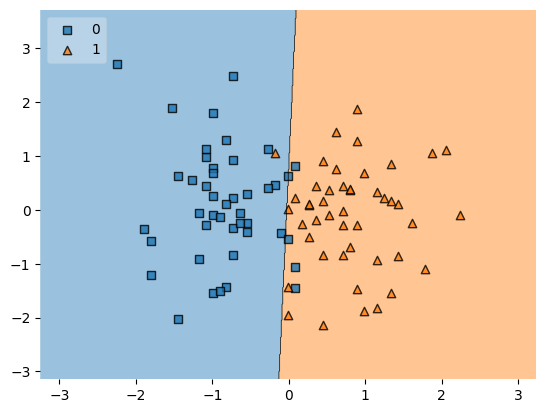

In [84]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [80]:
!pip install mlxtend

INFO: pip is looking at multiple versions of mlxtend to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 322.4 kB/s eta 0:00:03
   --------------- ------------------------ 0.5/1.4 MB 322.4 kB/s eta 0:00:03
   --------------- ------------------------ 0.5/1.4 MB 322.4 kB/s eta 0:00:03
 

In [81]:
import pickle

In [82]:
pickle.dump(clf,open('model.pkl','wb'))